<a href="https://colab.research.google.com/github/LindaIroha/AILEADTECH_ASSIGNMENT/blob/main/Credit_Card_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Problem Statement

#Context

The problem at hand is a customer segmentation problem for AllLife Bank. The objective is to identify different segments among the existing bank customers based on their spending patterns and past interactions with the bank. By applying clustering algorithms to the customer data, the goal is to uncover distinct groups of customers that exhibit similar behaviors and characteristics.

#Objective
The bank wants to gain insights into its customer base to improve market penetration and customer satisfaction. The marketing team aims to run personalized campaigns targeting new customers and upselling to existing customers. Meanwhile, the operations team aims to upgrade the service delivery model to address customer queries more efficiently.

#Data Description
The provided dataset includes various financial attributes of the customers, such as average credit limit, total number of credit cards, and interactions with the bank through different channels (visiting the bank, online visits, and calls to customer service). By clustering the customers based on these attributes, the Data Science team can provide recommendations to the bank on how to better market to and service these different customer segments.


#Data Dictionary

Sl_No: Primary key of the records
Customer Key: Customer identification number
Average Credit Limit: Average credit limit of each customer for all credit cards
Total credit cards: Total number of credit cards possessed by the customer
Total visits bank: Total number of visits that customer made (yearly) personally to the bank
Total visits online: Total number of visits or online logins made by the customer (yearly)
Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

#Importing necessary libraries

In [31]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Silence the FutureWarning
import warnings
warnings.simplefilter(action='ignore')

#Reading the Dataset

In [90]:
#upload csv file and read
from google.colab import files
uploaded = files.upload()


Saving Credit_Card_Customer_Data.xlsx to Credit_Card_Customer_Data (1).xlsx


In [91]:
#read the dataframe
file = pd.read_excel('Credit_Card_Customer_Data.xlsx')
file

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


The customer Key is a unique identifier for each customer and does carry meaningful information related to the outcome or target variable, it is relevant for model building and removing the customer Key introduced duplicates


In [92]:
#drop seial number column, it provides no information
file.drop(['Sl_No'], axis = 1, inplace = True)


The customer Key contains an important informaion in that it makes the entries unique and removal results in the creaton of duplicates

In [93]:
file.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [94]:
file.duplicated().sum()

0

In [95]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


All the variables are of type Integer

In [96]:
#check for missing values
file.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#Statistical Summary of the dataset

In [97]:
#simple statistics
file.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


#Checking the shape of the dataset

In [98]:
file.shape

(660, 6)

the data has 660 rows and 7 columns

#Exploratory Data Analysis

###Graphical Representation of dataset using Boxplot

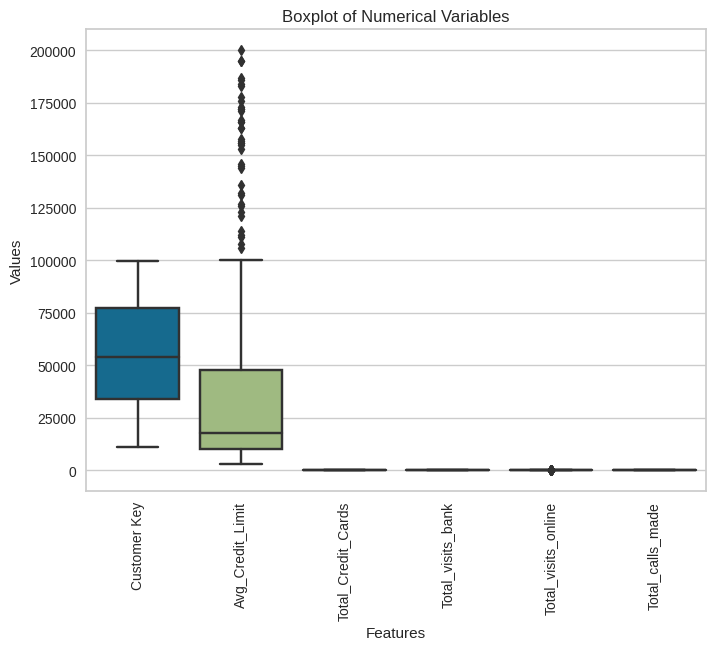

In [99]:

# Specify the figure size and create subplots
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Create the boxplot
sns.boxplot(ax=axes, data=file)

#set the xticks
plt.xticks(rotation = 90)

# Set the title and labels
axes.set_title("Boxplot of Numerical Variables")
axes.set_xlabel("Features")
axes.set_ylabel("Values")

# Show the plot
plt.show()

The boxplot shows the distribution of the dataset.
There was little variation in the Total_Credit_Card, Total_visits_bank and Total_calls_made columns. 
Outliers were present in Total_visits_online and Average_Credit_Limit columns


#Univariate Analysis

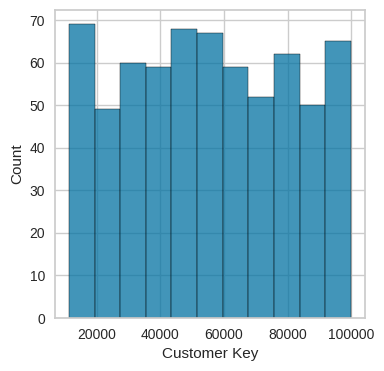

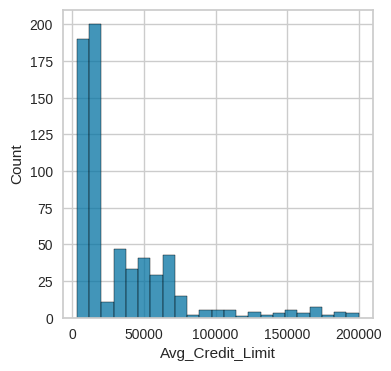

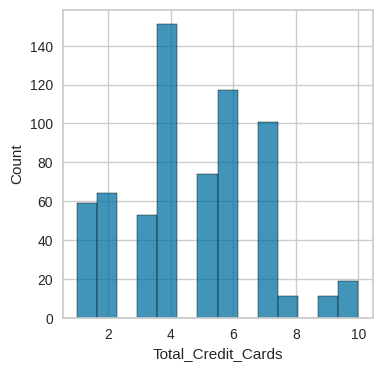

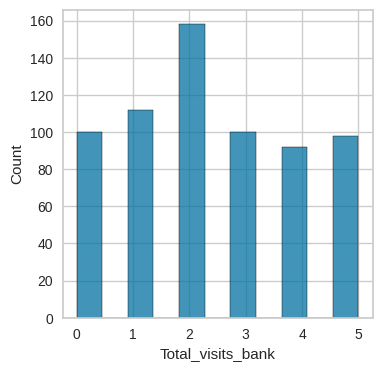

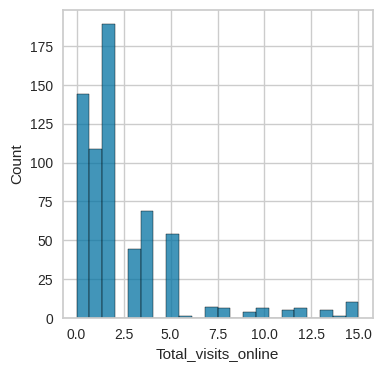

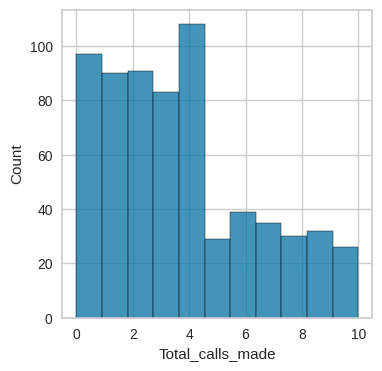

In [100]:
for col in file.columns:
    plt.figure(figsize=(4, 4))  # Set the figure size
    sns.histplot(file[col])
    plt.show() 


#Bivariate Analysis

<Axes: >

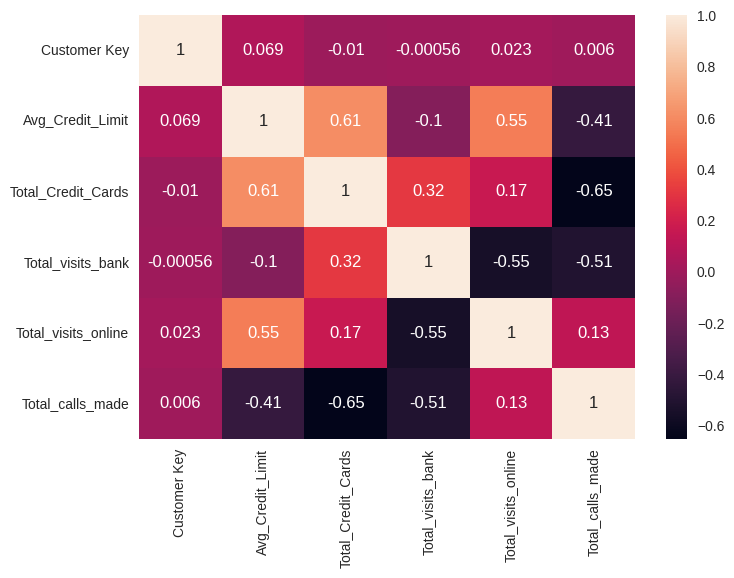

In [101]:
#Correlation
from pandas import core
cor=file.corr()
sns.heatmap(cor, annot = True)

total calls made is the highest in correlation

In [102]:
#Save a copy of the file
df=file.copy()

### Feature Scaling

 #### Scales the features of our data so that they all have a similar range.

In [103]:
# Store the feature names
feature_names = df.columns.tolist()

# Scale the data
scaler = StandardScaler()
df_sd = scaler.fit_transform(df)


#KMeans Clustering

In [104]:
# Initialize K-means on the scaled data
kmeans = KMeans( random_state=0)
kmeans.fit(df_sd)

KMeans(random_state=0)

In [105]:
df_sd

array([[ 1.24691971,  1.74018685, -1.24922476, -0.86045063, -0.54748969,
        -1.25153737],
       [-0.65320273,  0.41029254, -0.78758515, -1.47373077,  2.5205186 ,
         1.89185881],
       [-1.47609839,  0.41029254,  1.05897329, -0.86045063,  0.13428993,
         0.1455276 ],
       ...,
       [-0.05105538,  2.93709172,  1.5206129 , -0.86045063,  2.17962879,
        -0.90227113],
       [ 0.99629832,  3.65523464,  2.44389211, -0.86045063,  4.22496765,
        -1.25153737],
       [ 0.97657819,  3.52224521,  1.9822525 , -1.47373077,  3.20229822,
        -0.55300488]])

In [106]:
y_pred = kmeans.predict(df_sd)

In [107]:
y_pred

array([1, 0, 5, 5, 2, 7, 2, 5, 3, 0, 0, 0, 7, 0, 3, 7, 3, 3, 0, 0, 0, 7,
       0, 3, 0, 7, 7, 0, 3, 0, 0, 0, 7, 3, 0, 0, 7, 3, 7, 0, 7, 0, 3, 3,
       3, 7, 3, 3, 0, 3, 7, 3, 7, 0, 7, 3, 0, 0, 7, 7, 0, 0, 3, 3, 7, 3,
       3, 3, 7, 3, 0, 0, 0, 0, 0, 3, 3, 3, 7, 0, 7, 0, 3, 0, 3, 3, 0, 0,
       0, 0, 0, 7, 0, 3, 3, 0, 0, 3, 7, 0, 3, 7, 0, 7, 7, 0, 0, 3, 3, 0,
       3, 7, 7, 0, 0, 0, 7, 0, 3, 7, 0, 0, 3, 7, 3, 0, 0, 7, 0, 0, 0, 3,
       0, 0, 0, 0, 7, 7, 0, 7, 7, 3, 7, 3, 7, 0, 7, 3, 7, 0, 7, 3, 3, 0,
       7, 0, 0, 7, 0, 3, 7, 3, 3, 7, 7, 0, 7, 0, 0, 0, 7, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 7, 0, 7, 3, 3, 3, 0, 3, 3, 7, 0, 3, 0, 0, 7, 7, 0,
       0, 0, 7, 0, 0, 7, 0, 3, 3, 0, 0, 7, 3, 0, 3, 7, 7, 0, 3, 0, 0, 7,
       7, 3, 7, 7, 7, 3, 7, 7, 5, 5, 4, 1, 6, 5, 4, 6, 4, 4, 5, 5, 5, 6,
       5, 6, 5, 1, 6, 5, 4, 4, 5, 5, 4, 5, 5, 4, 1, 4, 5, 4, 6, 5, 6, 5,
       4, 4, 6, 4, 6, 4, 4, 5, 1, 4, 4, 5, 4, 4, 6, 4, 4, 5, 1, 5, 5, 6,
       4, 1, 5, 6, 5, 1, 5, 5, 6, 4, 4, 6, 4, 6, 6,

In [108]:
silhouette_score(df_sd, y_pred)

0.2285210878787809

In [109]:
kmeans.inertia_

933.3231070885404

The value kmeans.inertia_ = 933 represents the sum of squared distances of all data points to their nearest cluster centroid in the K-means clustering algorithm. It is also known as the "inertia" or "within-cluster sum of squares" (WCSS). The value of 933 for inertia suggests that the sum of squared distances of all data points to their nearest cluster centroid is relatively low, this depicts poor clustering results. It also indicates that the data points are not tightly grouped within their respective clusters.


###Choosing optimal number of clusters

Number of clusters: 1 	Average Distortion: 2.256953985735335
Number of clusters: 2 	Average Distortion: 1.7858322163326603
Number of clusters: 3 	Average Distortion: 1.5055314856497992
Number of clusters: 4 	Average Distortion: 1.363222352950455
Number of clusters: 5 	Average Distortion: 1.2726517868822131
Number of clusters: 6 	Average Distortion: 1.219426630337813
Number of clusters: 7 	Average Distortion: 1.179738177097504
Number of clusters: 8 	Average Distortion: 1.145060564635755


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

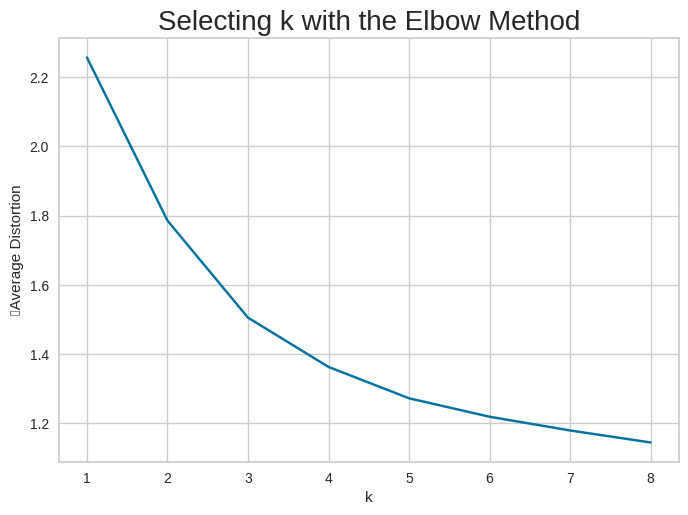

In [111]:
clusters = range(1, 9)
meanDistortions = [] #create an empty list

for k in clusters:
  model = KMeans(n_clusters = k) #Initiate KMeans
  model.fit(df_sd) #Fit KMeans on the scaled data
  prediction = model.predict(df_sd) #Predict the modelon the data
  distortion = (
      sum(np.min(cdist(df_sd, model.cluster_centers_, 'euclidean'), axis = 1))
      / df_sd.shape[0] #Find distortion
  )

  meanDistortions.append(
      distortion
  ) #Append distortion values to the empty list created above

  print('Number of clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k') #Title of X-axis
plt.ylabel('\tAverage Distortion') #Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize = 20) # Title of the plot

In the above plot, the elbow is seen at k=3 with optimal Average distortion seen at k= 8.
The output shows the average distortion for different numbers of clusters in a clustering algorithm. The average distortion is a measure of how well the data points within each cluster are grouped together. Lower values of average distortion indicate better clustering results.

Based on the output, we can see that as the number of clusters increases, the average distortion decreases. This is expected because with more clusters, the algorithm can better fit the data points and reduce the intra-cluster distances.

To interpret the results, let us consider the trade-off between the number of clusters and the average distortion:

For low number of clusters (e.g., 1 or 2), the average distortion is relatively high, indicating that the data points are not well-grouped within the clusters. This may suggest that the data does not have clear separations or distinct clusters.

As the number of clusters increases (e.g., 3, 4, 5), the average distortion decreases, indicating better grouping of data points. This suggests that the data may have some inherent structure that can be captured by clustering.


However, after a certain number of clusters (e.g., 6, 7, 8), the decrease in average distortion becomes less significant. This indicates that adding more clusters does not significantly improve the clustering performance.

For n_clusters = 2, silhouette score is 0.33817196365464486
For n_clusters = 3, silhouette score is 0.4177434852377372
For n_clusters = 4, silhouette score is 0.3228907072652812
For n_clusters = 5, silhouette score is 0.2850863954249504
For n_clusters = 6, silhouette score is 0.25413205265109257
For n_clusters = 7, silhouette score is 0.2376460958735122
For n_clusters = 8, silhouette score is 0.22838540159429524
For n_clusters = 9, silhouette score is 0.224632646299416


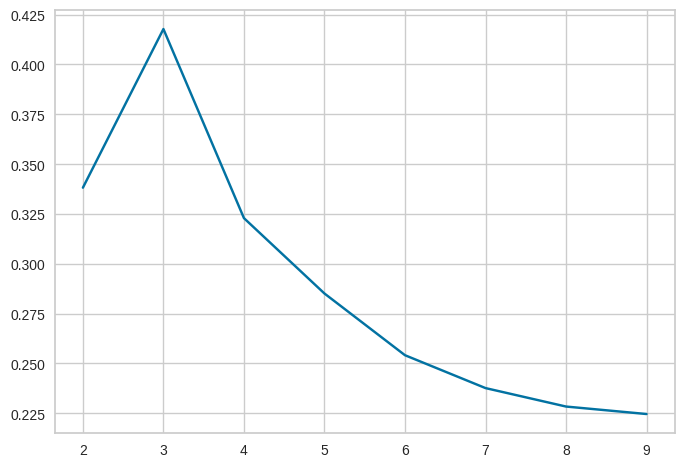

In [112]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((df_sd))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_sd, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

The silhouette score is a popular evaluation metric used to assess the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to other clusters. The silhouette score ranges from -1 to 1, where:

A score close to +1 indicates that the data point is well-matched to its own cluster and poorly-matched to neighboring clusters.
A score close to 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
A score close to -1 indicates that the data point is potentially assigned to the wrong cluster.

In the above plot, the highest silhouette score was observed at 2 ie 0.598, indicating that the clustering with 2 clusters provides a relatively good separation and distinction between the data points within the clusters.

A silhouette score of 0.598 indicates a reasonably strong clustering result. It suggests that the data points are well-matched within their assigned clusters and are sufficiently separated from neighboring clusters.

#Rebuilding the Model using k=3

In [113]:
kmeans2 = KMeans(n_clusters=3, random_state =0)
kmeans2.fit(df_sd)

KMeans(n_clusters=3, random_state=0)

In [114]:
kmeans2.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [115]:
# Convert the scaled data array to a DataFrame
df_sd = pd.DataFrame(df_sd, columns=feature_names)

# Add K-means cluster labels to the original dataframe
df_sd['Kmeans_clusters'] = kmeans2.labels_

In [116]:
df_sd

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...,...
655,-0.157505,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,0.218310,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,-0.051055,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,0.996298,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [117]:
#select the numeric column
num_col = df_sd.select_dtypes(include=np.number).columns.tolist()

#Visualization

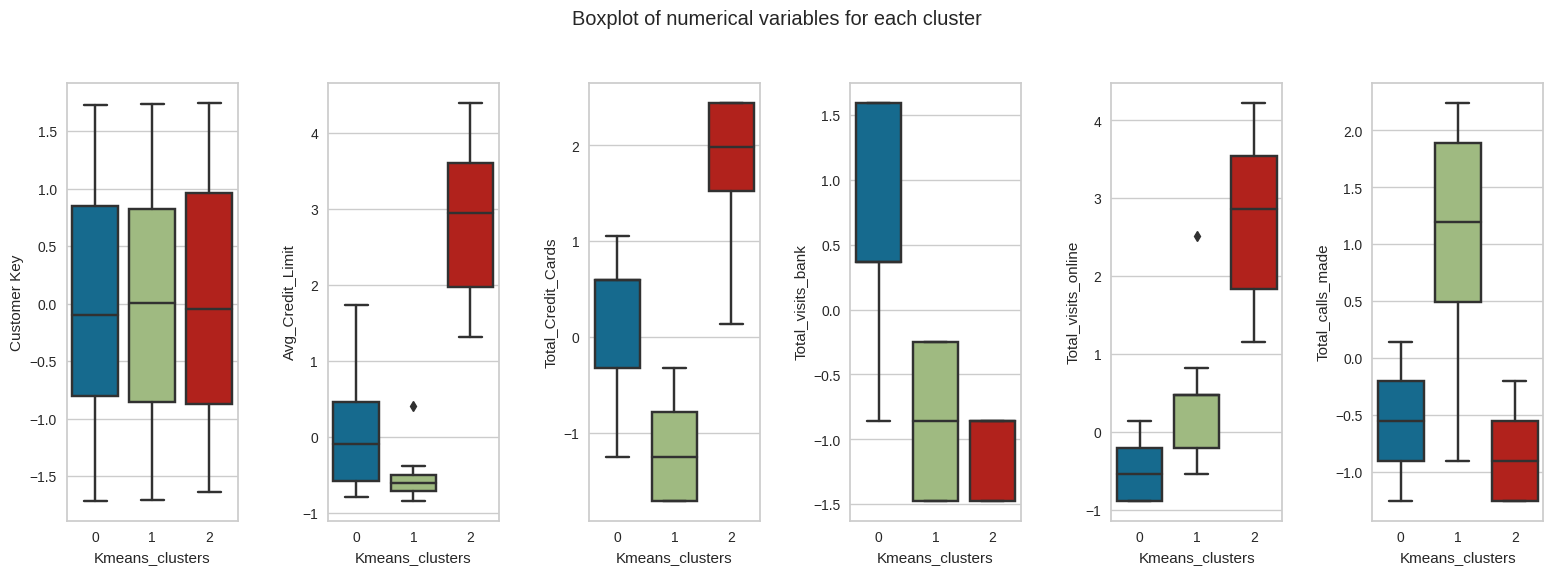

In [118]:
fig, axes = plt.subplots(1, 6, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(6):
    sns.boxplot(ax=axes[ii], y=df_sd[num_col[counter]], x=df_sd["Kmeans_clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)


Barplot of the mean values of each numerical variable in the DataFrame df_sd, grouped by the "Kmeans_clusters" column.

#Interpretation of Plot

####Cluster 0
The Avg Credit Limit, Total visits online and TotalCalls made are low 
Totalbank visit is high, followed by the totol credit card
####Cluster 1
The Total credit card, Total bank visits and Total online visits are low to moderate
Avg Credit Limit is very low
Total calls made is the highest
####Cluster2
 Avg Credit Limit, Total credit cards, Total online visits are high
Total calls made,  Total bank visits are low to moderate


#Bar plot visualing the average values of each feature for each cluster. 

<Axes: xlabel='Kmeans_clusters'>

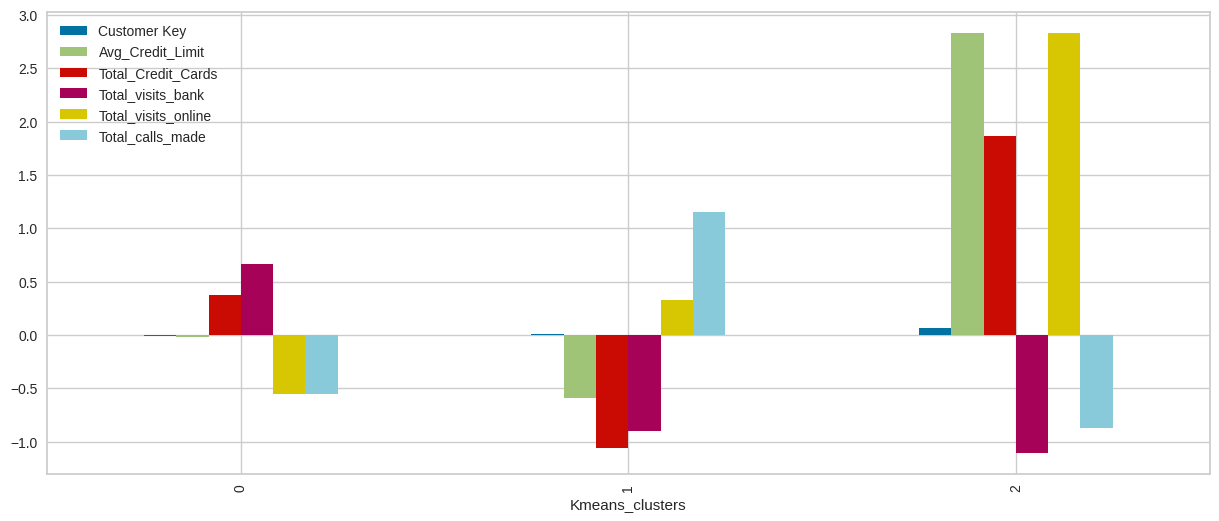

In [120]:
df_sd.groupby("Kmeans_clusters").mean().plot.bar(figsize=(15,6))

#Density-Based Spatial Clustering of Applications with Noise(DBSCAN)

Import necessary libraries

In [121]:
#Create an instance of the DBSCAN
dbscan = DBSCAN()

#fit and predict the labels
dbscan.fit(df_sd)
db_labels = dbscan.labels_

#db_labels = dbscan.fit_predict(df_sd)

In [123]:
#check the labels
np.unique(db_labels)

array([-1,  0])

# Implementing DBSCAN across the different hyperparameters


Choosing optimal values of eps and minPts

In [124]:
#import itertools
import itertools

In [125]:
#Trying values of eps between 0.1 and 1; minPts between 2 and 10
eps = np.linspace(0.1, 1, 10)
minPts = np.arange(2, 10)

In [126]:
hyper_list = list(itertools.product(eps_values, minPts_values))

for (eps, minPts) in hyper_list:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(df_sd)

    num_labels = len(np.unique(labels))
    if num_labels > 1:
        score = silhouette_score(df_sd, labels)
        print(f'eps: {eps}; minPts: {minPts}; num_labels: {num_labels}; Silhouette score: {score}')
       
    # else:
    #     print(f'eps: {eps}; minPts: {minPts}; num_labels: {num_labels}')
    #     print('Only one unique label. Silhouette score cannot be calculated.')


eps: 0.1; minPts: 2; num_labels: 2; Silhouette score: -0.03378263144280089
eps: 0.2; minPts: 2; num_labels: 12; Silhouette score: -0.48936104388091206
eps: 0.30000000000000004; minPts: 2; num_labels: 23; Silhouette score: -0.5048674249055718
eps: 0.30000000000000004; minPts: 3; num_labels: 2; Silhouette score: -0.09725281305009587
eps: 0.4; minPts: 2; num_labels: 58; Silhouette score: -0.40669752965884964
eps: 0.4; minPts: 3; num_labels: 9; Silhouette score: -0.4388350511474285
eps: 0.4; minPts: 4; num_labels: 2; Silhouette score: -0.07558591730284799
eps: 0.5; minPts: 2; num_labels: 92; Silhouette score: -0.2618875686927412
eps: 0.5; minPts: 3; num_labels: 25; Silhouette score: -0.4190209117157859
eps: 0.5; minPts: 4; num_labels: 8; Silhouette score: -0.38517505700990545
eps: 0.5; minPts: 5; num_labels: 2; Silhouette score: -0.07825567728623907
eps: 0.6; minPts: 2; num_labels: 98; Silhouette score: -0.19179060516072383
eps: 0.6; minPts: 3; num_labels: 45; Silhouette score: -0.27729436

#Rebuild DBSCAN

In [127]:
dbscan2 = DBSCAN(eps = 1.0, min_samples =7)
db_labels2 = dbscan2.fit_predict(df_sd)

In [128]:
#check the unique labels
np.unique(db_labels2)

array([-1,  0,  1])

In [129]:
#add the dbscan labels to the dataframe
df_sd['db_labels2'] = db_labels2

#Visualizing groups

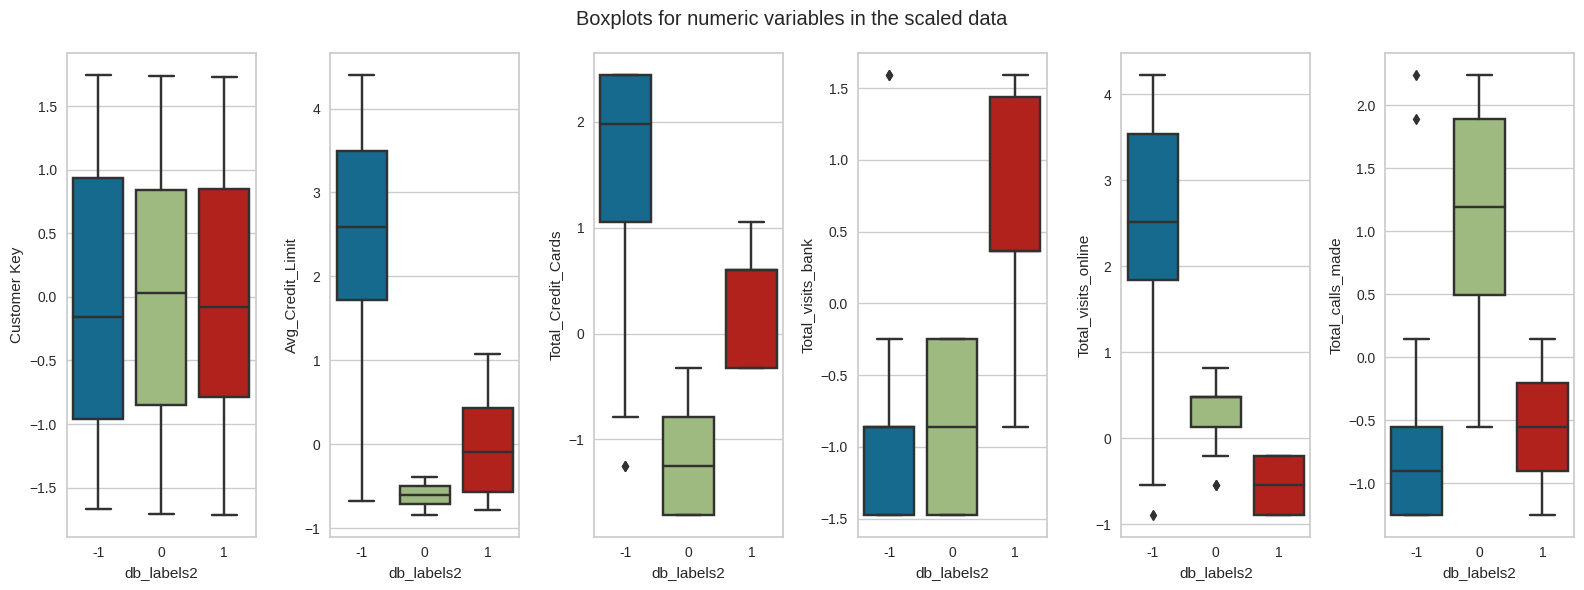

In [130]:
fig, ax = plt.subplots(1, 6, figsize =(16, 6))
fig.suptitle('Boxplots for numeric variables in the scaled data')

count = 0
for i in range(6):
  sns.boxplot(ax = ax[i], x = df_sd['db_labels2'], y= df_sd[num_col[count]])
  count +=1
fig.tight_layout()

#Interpretation of Plot

####Cluster -1
Avg Credit, Total Credit Cards, Total Visits online are high while
Total bank visit and Total call made are low

####Cluster 0

Avg Credit, Total bank visit and total credit cards are low  while 
Total visit online is moderate and
Total calls made is high

####Cluster 1
Total credit cards and total bank visits are high while
Avg Credit, Total visit online and total calls made are low

#Compare clusters obtained from K-means and DBSCAN clustering techniques


Overall, both clustering techniques have identified similar patterns in terms of customer behavior and characteristics. However, there may be slight differences in the composition of the clusters and the emphasis on certain attributes.

#Dataframes showing the different cluster labels

In [131]:
df_sd.query('db_labels2 == 1')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_labels2
3,-0.571901,-0.121665,0.135694,-0.860451,-0.54749,0.145528,0,1
228,-0.011849,-0.653623,1.058973,-0.247170,-0.88838,-1.251537,0,1
229,-0.776600,-0.706819,1.058973,-0.247170,-0.54749,0.145528,0,1
230,-0.332175,-0.467438,-0.325946,1.592670,-0.88838,-0.553005,0,1
231,1.666783,-0.414242,0.597334,0.366110,-0.20660,-0.203739,0,1
...,...,...,...,...,...,...,...,...
607,1.368677,-0.015274,0.597334,0.366110,-0.54749,-1.251537,0,1
608,-0.226506,0.330499,-0.325946,0.979390,-0.54749,-1.251537,0,1
609,-1.701767,0.091118,-0.325946,0.366110,-0.20660,-1.251537,0,1
610,-1.518585,0.117716,1.058973,-0.247170,-0.54749,-1.251537,0,1


In [132]:
df_sd.query('db_labels2 == 0')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_labels2
5,0.136383,-0.387644,-0.787585,-1.473731,-0.54749,1.542593,1,0
8,1.067955,-0.786612,-1.249225,-1.473731,-0.20660,-0.553005,1,0
9,-0.405002,-0.839808,-0.325946,-1.473731,-0.54749,1.193326,1,0
10,-0.093737,-0.653623,-0.325946,-1.473731,0.81607,0.494794,1,0
11,-0.109942,-0.573829,-0.787585,-1.473731,-0.20660,1.193326,1,0
...,...,...,...,...,...,...,...,...
224,1.601882,-0.600427,-0.325946,-0.860451,0.81607,1.891859,1,0
225,0.237913,-0.494036,-0.325946,-0.860451,-0.20660,0.494794,1,0
226,0.027630,-0.706819,-1.710864,-0.247170,0.47518,1.542593,1,0
227,0.039618,-0.706819,-1.249225,-0.247170,0.13429,1.542593,1,0


In [133]:
df_sd.query('db_labels2 == -1')

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_clusters,db_labels2
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0,-1
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,1,-1
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,0,-1
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,2,-1
6,-0.264423,1.740187,0.135694,-1.473731,2.861408,-0.553005,2,-1
7,-0.693736,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,1,-1
27,-1.573215,-0.680221,-1.249225,-0.247170,-0.206600,2.241125,1,-1
431,-1.043935,0.995446,0.597334,1.592670,-0.206600,-0.203739,0,-1
476,-1.666856,0.942250,0.597334,1.592670,-0.888380,0.145528,0,-1
612,1.532686,3.256266,1.982253,-0.860451,3.884078,-0.902271,2,-1


#Recommendations

Based on the clustering results, we have three identified clusters. Let's interpret each cluster in the context of the problem:

Cluster -1:
Customers in this cluster have high average credit limit, total credit cards, and total visits online. However, they have low total bank visits and total calls made. This cluster represents a group of customers who prefer online interactions and have higher credit limits and credit card usage. They may require personalized online campaigns and improved online support services to cater to their needs.

Cluster 0:
Customers in this cluster have low average credit limit, total bank visits, and total credit cards. They have moderate total visits online and high total calls made. This cluster represents customers who have lower credit limits and prefer contacting the bank through phone calls rather than visiting in person or using online channels. To target and serve these customers effectively, the bank may focus on improving call center services and providing personalized offers over the phone.

Cluster 1:
Customers in this cluster have high total credit cards and total bank visits. However, they have low average credit limit, total visits online, and total calls made. This cluster represents customers who frequently visit the bank and have multiple credit cards but have lower credit limits and prefer face-to-face interactions. The bank can focus on enhancing in-branch services and offering tailored products to meet the needs of these customers.

Overall, these cluster insights can guide the bank's marketing and operations teams in developing targeted campaigns and service delivery models. The bank can utilize personalized online campaigns for customers in Cluster -1, improve call center services for customers in Cluster 0, and enhance in-branch services for customers in Cluster 1. By understanding the spending patterns and interaction preferences of each cluster, the bank can effectively market to and serve their customers, ultimately improving customer satisfaction and penetration in the market.